In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df = data.frame

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


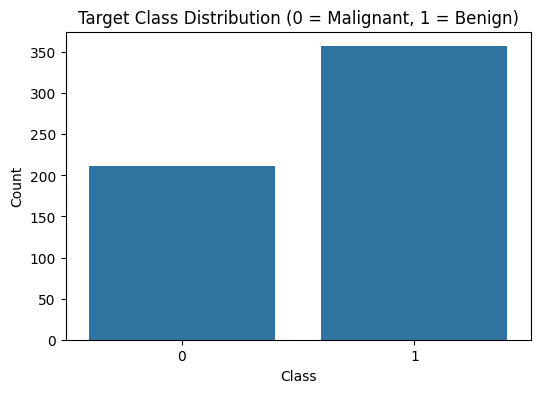

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Target Class Distribution (0 = Malignant, 1 = Benign)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

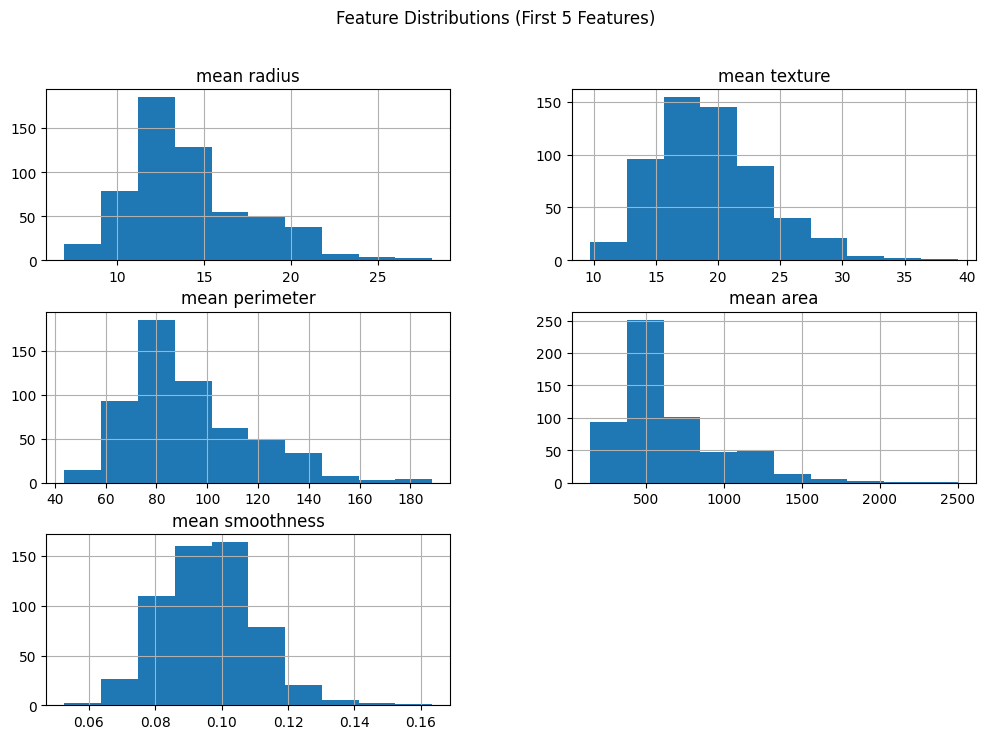

In [ ]:
df.iloc[:, :5].hist(figsize=(12,8))
plt.suptitle("Feature Distributions (First 5 Features)")
plt.show()

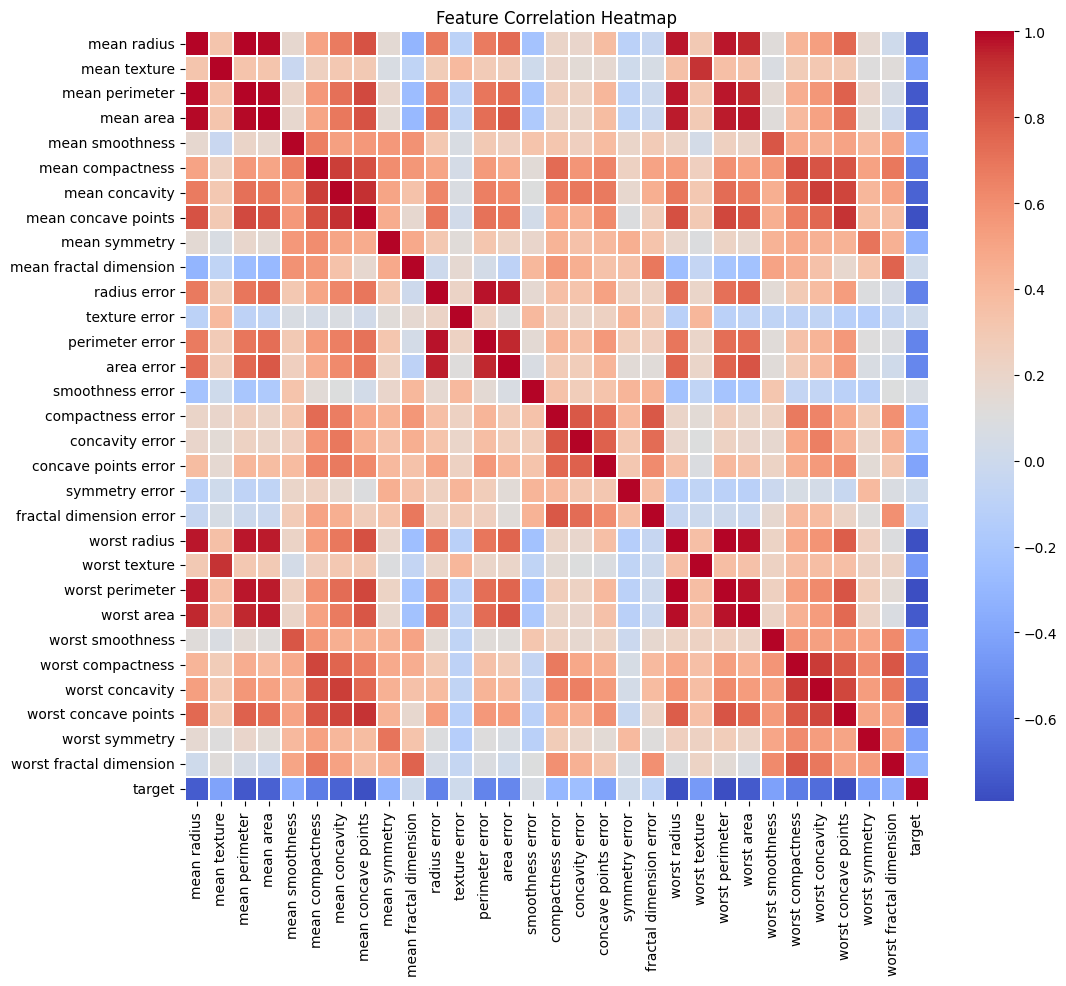

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.2)
plt.title("Feature Correlation Heatmap")
plt.show()

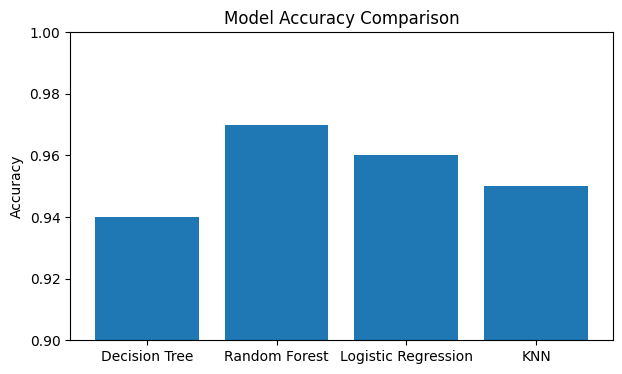

In [ ]:
model_accuracies = {
    "Decision Tree": 0.94,
    "Random Forest": 0.97,
    "Logistic Regression": 0.96,
    "KNN": 0.95
}

plt.figure(figsize=(7,4))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()

In [ ]:
!pip install dagster==1.12.13 dagster-webserver==1.12.13 "protobuf<6" scikit-learn pandas matplotlib seaborn joblib

In [ ]:
!mkdir -p dagster_ml/assets
!touch dagster_ml/__init__.py
!touch dagster_ml/assets/__init__.py
!touch dagster_ml/assets/pipeline.py
!touch dagster_ml/repo.py

In [ ]:
!nohup dagster dev -f dagster_ml/repo.py --port 3000 &

nohup: appending output to 'nohup.out'


In [ ]:
!cat nohup.out

In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared
!cloudflared --version

In [ ]:
!cloudflared tunnel --url http://localhost:3000

In [13]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Save to CSV
df.to_csv("breast_cancer_dataset.csv", index=False)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
!zip -r dagster_pipeline.zip dagster_ml A033_Meet_Pawar.ipynb README.md breast_cancer_dataset.csv

	zip warning: name not matched: A033_Meet_Pawar.ipynb
	zip warning: name not matched: README.md
  adding: dagster_ml/ (stored 0%)
  adding: dagster_ml/__pycache__/ (stored 0%)
  adding: dagster_ml/__pycache__/repo.cpython-312.pyc (deflated 24%)
  adding: dagster_ml/__pycache__/__init__.cpython-312.pyc (deflated 23%)
  adding: dagster_ml/assets/ (stored 0%)
  adding: dagster_ml/assets/__pycache__/ (stored 0%)
  adding: dagster_ml/assets/__pycache__/pipeline.cpython-312.pyc (deflated 55%)
  adding: dagster_ml/assets/__pycache__/__init__.cpython-312.pyc (deflated 22%)
  adding: dagster_ml/assets/pipeline.py (deflated 72%)
  adding: dagster_ml/assets/__init__.py (stored 0%)
  adding: dagster_ml/__init__.py (stored 0%)
  adding: dagster_ml/repo.py (deflated 58%)
  adding: breast_cancer_dataset.csv (deflated 61%)
